In [2]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from copy import deepcopy as dcopy
from z3 import *

https://cracking-the-cryptic.web.app/sudoku/3Btgb7QLLp

In [3]:
def sol_print(solution):
    x= np.ones((3,3))
    groups = np.block([[x*0,x*1,x*2],[x*3,x*4,x*5],[x*6,x*7,x*8]])
    fig,ax = plt.subplots(1,1,figsize=(4,4))
    count = 0
    x = np.array(solution.astype('int').astype('str'))
    x[x=="0"] ="-"
    y = groups
    ax = sns.heatmap(y,annot=x,cbar=False,cmap="tab20",fmt="",vmin=0,vmax=19,linewidths=1,annot_kws={"size":14})
    ax.axis("off")    
    plt.tight_layout()
    plt.show()

In [8]:
soln =[[6,9,3,5,4,1,2,7,8],
       [2,1,5,7,8,6,3,4,9],
       [4,8,7,9,3,2,1,5,6],
       [8,6,2,1,5,3,4,9,7], 
       [5,3,4,8,7,9,6,1,2],
       [1,7,9,6,2,4,5,8,3],
       [7,2,1,4,6,8,9,3,5],
       [3,4,8,2,9,5,7,6,1],
       [9,5,6,3,1,7,8,2,4]]

fixed =[[0, 0, 0, 0, 0, 1, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 3, 4, 0],
        [0, 0, 0, 0, 0, 0, 0, 5, 6],
        [0, 0, 0, 0, 0, 0, 0, 0, 7],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [7, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 4, 8, 0, 0, 0, 0, 0, 0],
        [0, 0, 6, 3, 0, 0, 0, 0, 0]]

Solved in 0.12566423416137695 seconds


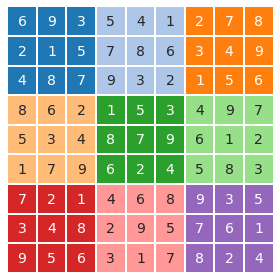

In [28]:
def z3_sudoku(grid,fixed):

    # 9x9 matrix of integer variables
    X = [ [Int("x_%s_%s" % (i+1, j+1)) for j in range(9) ]  for i in range(9) ]

    # each cell contains a value in {1, ..., 9}
    cells_c  = [ And(1 <= X[i][j], X[i][j] <= 9)
             for i in range(9) for j in range(9) ]

    # each row contains a digit at most once
    rows_c   = [ Distinct(X[i]) for i in range(9) ]

    # each column contains a digit at most once
    cols_c   = [ Distinct([ X[i][j] for i in range(9) ])
             for j in range(9) ]

    # each 3x3 square contains a digit at most once
    sq_c     = [ Distinct([ X[3*i0 + i][3*j0 + j]
                        for i in range(3) for j in range(3) ])
             for i0 in range(3) for j0 in range(3) ]

    sudoku_c = cells_c + rows_c + cols_c + sq_c

    s = Tactic('lia').solver()
    s.add(sudoku_c)
    
    s += [X[i][j] == fixed[i][j] for i in range(9) for j in range(9) if fixed[i][j] != 0]
    s += [X[i][j] == grid[i][j] for i in range(9) for j in range(9) if grid[i][j] != 0]
    
    clone = [(0,0),(1,-1),(1,1),(2,0),(2,2),(3,1),(3,3),(4,2)]
    s += Or([And([X[i+a][j+b] == X[2+a][3+b] for a,b in clone]) for i in range(5) for j in range(1,6) if (i,j) != (2,3)])
    
  
    start = time.time()
    if s.check() == sat:
        m = s.model()
        r = [ [ m.evaluate(X[i][j]).as_long() for j in range(9) ]
                 for i in range(9) ]
        print("Solved in {} seconds".format(time.time()-start))
        sol_print(np.array(r))

    else:
        print("Failed in {} seconds".format(time.time()-start))


z3_sudoku(np.zeros((9,9)),fixed)

In [22]:
describe_tactics()

ackermannize_bv : A tactic for performing full Ackermannization on bv instances.
subpaving : tactic for testing subpaving module.
horn : apply tactic for horn clauses.
horn-simplify : simplify horn clauses.
nlsat : (try to) solve goal using a nonlinear arithmetic solver.
qfnra-nlsat : builtin strategy for solving QF_NRA problems using only nlsat.
nlqsat : apply a NL-QSAT solver.
qe-light : apply light-weight quantifier elimination.
qe : apply quantifier elimination.
qsat : apply a QSAT solver.
qe2 : apply a QSAT based quantifier elimination.
qe_rec : apply a QSAT based quantifier elimination recursively.
psat : (try to) solve goal using a parallel SAT solver.
sat : (try to) solve goal using a SAT solver.
sat-preprocess : Apply SAT solver preprocessing procedures (bounded resolution, Boolean constant propagation, 2-SAT, subsumption, subsumption resolution).
ctx-solver-simplify : apply solver-based contextual simplification rules.
smt : apply a SAT based SMT solver.
psmt : builtin strate